In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True, precision=3)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Data

In [4]:
restaurantRawDf = pd.read_csv("/content/drive/MyDrive/data/restaurant.csv", encoding="UTF-8")
restaurantDf1 = restaurantRawDf[['料理区分']]
restaurantDf1 = pd.get_dummies(restaurantDf1, drop_first=True)
restaurantDf2 = restaurantRawDf[['ランチ価格(円)', 'カロリー', '味濃い', '見た目', 'ゆっくり座れる']]
restaurantDf3 = restaurantRawDf[['好き']]
restaurantDf = pd.concat([restaurantDf1, restaurantDf2, restaurantDf3], axis=1)

RawData = restaurantDf.values

# check data
print(type(RawData))
print(RawData[:5])

<class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0 600 430   3   3   3   0]
 [  0   0   0   1   0   0   0   0   0   0   0 450 350   1   3   2   1]
 [  0   0   0   0   0   0   0   1   0   0   0 550 640   3   2   2   0]
 [  0   0   0   0   0   0   1   0   0   0   0 850 900   5   1   5   0]
 [  0   0   0   0   0   0   0   0   1   0   0 650 700   2   2   3   0]]


In [5]:
# Normalization
NpData = np.zeros(RawData.shape)
for i in range(RawData.shape[1]) :
  tmp = RawData[:,i]
  NpData[:,i] = (tmp - tmp.min()) / (tmp.max() - tmp.min())
  # Standardization: NpData[:,i] = (tmp - tmp.mean()) / tmp.std()

# np array to tensor
# X=input　data, Z=ground truth data
X = torch.tensor(NpData[:,:-1]).float()
Z = torch.tensor(NpData[:,-1]).float().view((-1,1)) # 1col become vector, so use "view" change it to matrix

## Define Model

In [6]:
class myNet(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    # Linear Combination s 
    # number of Units=3
    self.s2 = nn.Linear(n_input, 3)
    self.s3 = nn.Linear(3, 3)
    self.s4 = nn.Linear(3, n_output)

    # Activation Function
    self.sigmoid = nn.Sigmoid()

  # Forward Propagation
  def forward(self,x):
    # 2nd layer
    x = self.s2(x)
    x = self.sigmoid(x)
    # 3rd layer
    x = self.s3(x)
    x = self.sigmoid(x)
    # 4th layer (output layer)
    x = self.s4(x)
    x = self.sigmoid(x)
    return x

## Learning Steps

In [7]:
# fix seed
torch.manual_seed(12345)

net = myNet(X.shape[1],Z.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# check parameters in net
for parameter in net.named_parameters():
  print(parameter)

('s2.weight', Parameter containing:
tensor([[ 0.2409,  0.1898,  0.2461, -0.0195, -0.2084, -0.1608, -0.0663,  0.0338,
         -0.0812, -0.1440, -0.0203,  0.1577,  0.2079, -0.1234, -0.1433, -0.0115],
        [ 0.1100,  0.1119, -0.0931,  0.0866, -0.0425, -0.0300, -0.2027,  0.1791,
         -0.1763,  0.0623, -0.1251, -0.2108, -0.0159,  0.0830, -0.2294,  0.0181],
        [-0.0940, -0.0356, -0.1115, -0.0311,  0.2249, -0.2403, -0.1183,  0.2125,
         -0.0132, -0.0519,  0.0841, -0.1056,  0.1027, -0.1542, -0.0752,  0.1913]],
       requires_grad=True))
('s2.bias', Parameter containing:
tensor([ 0.0245, -0.1977,  0.1502], requires_grad=True))
('s3.weight', Parameter containing:
tensor([[-0.3837, -0.0373, -0.0017],
        [-0.2544,  0.2584, -0.0571],
        [ 0.3153,  0.2934, -0.4515]], requires_grad=True))
('s3.bias', Parameter containing:
tensor([0.4312, 0.0144, 0.4559], requires_grad=True))
('s4.weight', Parameter containing:
tensor([[ 0.3593, -0.1698, -0.1143]], requires_grad=True))
('s

## Start Learning

In [8]:
num_epochs = 1000
progress = np.zeros((0,2))

for epoch in range(num_epochs):
  Yp = net.forward(X)
  err = criterion(Yp,Z)
  err.backward()

  optimizer.step()
  optimizer.zero_grad()
  
  if (epoch % 10 == 0):
    item = np.array([epoch, err.item()])
    progress = np.vstack((progress, item))
    print(f'epoch = {epoch}  err = {err:.4f}')

epoch = 0  err = 0.2549
epoch = 10  err = 0.2484
epoch = 20  err = 0.2483
epoch = 30  err = 0.2472
epoch = 40  err = 0.2455
epoch = 50  err = 0.2417
epoch = 60  err = 0.2342
epoch = 70  err = 0.2207
epoch = 80  err = 0.2011
epoch = 90  err = 0.1785
epoch = 100  err = 0.1577
epoch = 110  err = 0.1412
epoch = 120  err = 0.1288
epoch = 130  err = 0.1195
epoch = 140  err = 0.1124
epoch = 150  err = 0.1068
epoch = 160  err = 0.1022
epoch = 170  err = 0.0984
epoch = 180  err = 0.0951
epoch = 190  err = 0.0922
epoch = 200  err = 0.0898
epoch = 210  err = 0.0876
epoch = 220  err = 0.0856
epoch = 230  err = 0.0839
epoch = 240  err = 0.0824
epoch = 250  err = 0.0811
epoch = 260  err = 0.0799
epoch = 270  err = 0.0788
epoch = 280  err = 0.0779
epoch = 290  err = 0.0771
epoch = 300  err = 0.0764
epoch = 310  err = 0.0757
epoch = 320  err = 0.0751
epoch = 330  err = 0.0746
epoch = 340  err = 0.0741
epoch = 350  err = 0.0737
epoch = 360  err = 0.0733
epoch = 370  err = 0.0730
epoch = 380  err = 0.07

## Result

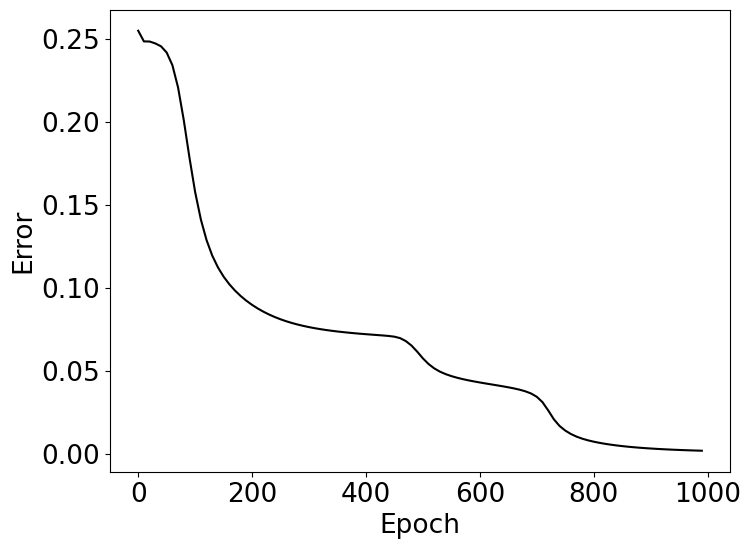

In [9]:
# Learning Curve
plt.rcParams['font.size'] = 19
plt.rcParams['figure.figsize'] = (8,6)
plt.plot(progress[:,0], progress[:,1], 'k')
plt.xlabel('Epoch');plt.ylabel('Error');
plt.savefig('learning_curve.png')

In [10]:
Yp_np = Yp.data.numpy().copy()
Z_np = Z.data.numpy().copy()
YZ = np.hstack([Yp_np,Z_np])
print(YZ.T)

[[0.021 0.991 0.003 0.003 0.003 0.992 0.003 0.003 0.021 0.944 0.04  0.007
  0.883 0.987 0.945 0.124 0.988 0.069 0.976 0.988 0.946 0.977 0.99  0.003
  0.983 0.991]
 [0.    1.    0.    0.    0.    1.    0.    0.    0.    1.    0.    0.
  1.    1.    1.    0.    1.    0.    1.    1.    1.    1.    1.    0.
  1.    1.   ]]
